## EDA for the Log Anamly

In [1]:
import pandas as pd
import time
import copy
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import nltk
from sklearn.model_selection import train_test_split
nltk.download('stopwords')
from nltk.corpus import stopwords
from pathlib import Path
from yellowbrick.target import class_balance
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
train_path = Path('data','train.json')

In [9]:
train_path #new_log/data/train.json /workspaces/codespaces-blank/new_log/data/train.json

PosixPath('.data/train.json')

In [10]:
t1 =time.time()
main_df = pd.read_json(train_path, orient='index')
t2 =time.time()
main_df.reset_index(inplace = True)
main_df.rename(columns= {0 : 'Target', 'index' :'Log'}, inplace= True)
print(t2-t1)

FileNotFoundError: File .data/train.json does not exist

In [ ]:
main_df.head()

,Log,Target
0,1117838570 2005.06.03 R02-M1-N0-C:J12-U11 200...,normal
1,1117838570 2005.06.03 R02-M1-N0-C:J12-U11 200...,normal
2,1117838570 2005.06.03 R02-M1-N0-C:J12-U11 200...,normal
3,1117838570 2005.06.03 R02-M1-N0-C:J12-U11 200...,normal
4,1117838570 2005.06.03 R02-M1-N0-C:J12-U11 200...,normal


In [ ]:
print(f"Dataset is has {main_df.shape[0]} samples")

Dataset is has 4152659 samples


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

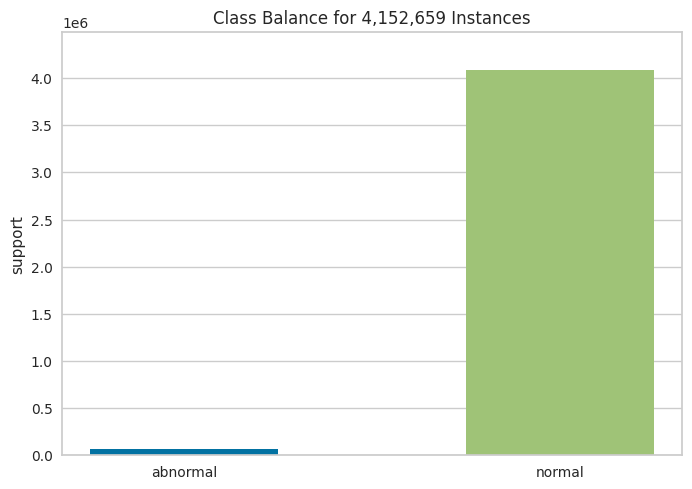

ClassBalance(ax=<Axes: title={'center': 'Class Balance for 4,152,659 Instances'}, ylabel='support'>)

In [ ]:
class_balance(main_df['Target'])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(main_df['Log'], main_df['Target'], random_state= 23, test_size=0.85,
                                                    stratify=main_df['Target'])

In [ ]:
X_train.shape, Y_train.shape

((830531,), (830531,))

In [ ]:
df = pd.DataFrame()
df['Log'] = X_train
df['Target'] = Y_train
df.reset_index(inplace=True)
df.drop(['index'], axis = 1,inplace= True)
df.head()

,Log,Target
0,1119725020 2005.06.25 R16-M0-N6-C:J16-U01 200...,normal
1,1133447897 2005.12.01 R15-M1-NA-C:J16-U11 200...,normal
2,1132938012 2005.11.25 R70-M0-N0-I:J18-U11 200...,normal
3,1118770548 2005.06.14 R27-M1-N4-C:J10-U01 200...,normal
4,1120148965 2005.06.30 R33-M1-NA-C:J06-U11 200...,normal


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

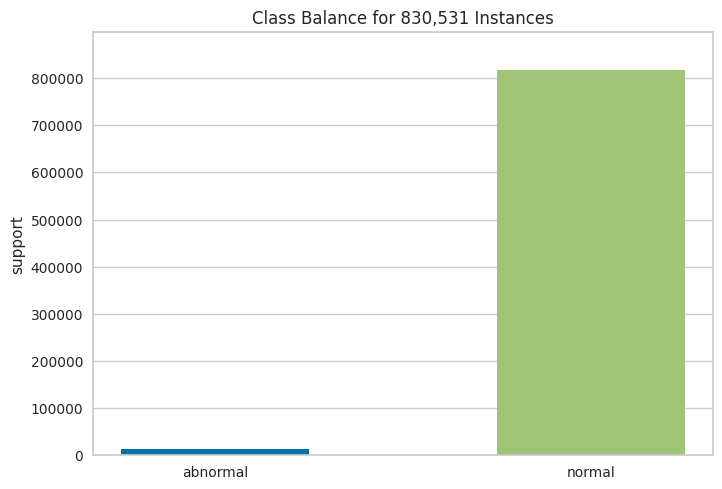

ClassBalance(ax=<Axes: title={'center': 'Class Balance for 830,531 Instances'}, ylabel='support'>)

In [ ]:
class_balance(df['Target'])

In [ ]:
#Exploring a few samples 
samples = list(df.iloc[:10,0])
for doc in samples:
    print(doc)

 1119725020 2005.06.25 R16-M0-N6-C:J16-U01 2005-06-25-11.43.40.545372 R16-M0-N6-C:J16-U01 RAS KERNEL INFO generating core.25228

 1133447897 2005.12.01 R15-M1-NA-C:J16-U11 2005-12-01-06.38.17.459485 R15-M1-NA-C:J16-U11 RAS KERNEL INFO 10680 total interrupts. 0 critical input interrupts. 0 microseconds total spent on critical input interrupts, 0 microseconds max time in a critical input interrupt.

 1132938012 2005.11.25 R70-M0-N0-I:J18-U11 2005-11-25-09.00.12.543494 R70-M0-N0-I:J18-U11 RAS KERNEL INFO ciod: Received signal 15, code=0, errno=0, address=0x000001f5

 1118770548 2005.06.14 R27-M1-N4-C:J10-U01 2005-06-14-10.35.48.496226 R27-M1-N4-C:J10-U01 RAS KERNEL FATAL program interrupt: fp compare...............0

 1120148965 2005.06.30 R33-M1-NA-C:J06-U11 2005-06-30-09.29.25.197801 R33-M1-NA-C:J06-U11 RAS KERNEL INFO generating core.11158

 1120967902 2005.07.09 R11-M0-NB-C:J04-U11 2005-07-09-20.58.22.251805 R11-M0-NB-C:J04-U11 RAS KERNEL INFO 1404005200 double-hummer alignment except

In [ ]:
df.iloc[4,0].split()

['1120148965',
 '2005.06.30',
 'R33-M1-NA-C:J06-U11',
 '2005-06-30-09.29.25.197801',
 'R33-M1-NA-C:J06-U11',
 'RAS',
 'KERNEL',
 'INFO',
 'generating',
 'core.11158']

In [ ]:
df["Character_Length"] = df["Log"].str.len()
df["Word_Length"] = df["Log"].str.split().map(lambda x: len(x))
df["Avg Word"] = df["Log"].str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x))
df.head()

,Log,Target,Character_Length,Word_Length,Avg Word
0,1119725020 2005.06.25 R16-M0-N6-C:J16-U01 200...,normal,128,10,11.700000
1,1133447897 2005.12.01 R15-M1-NA-C:J16-U11 200...,normal,271,32,7.437500
2,1132938012 2005.11.25 R70-M0-N0-I:J18-U11 200...,normal,168,15,10.133333
3,1118770548 2005.06.14 R27-M1-N4-C:J10-U01 200...,normal,153,12,11.666667
4,1120148965 2005.06.30 R33-M1-NA-C:J06-U11 200...,normal,128,10,11.700000


In [ ]:
print(f"Character Length ranges from {df['Character_Length'].min()} to {df['Character_Length'].max()}")
print(f"Word Length ranges from {df['Word_Length'].min()} to {df['Word_Length'].max()}")

Character Length ranges from 94 to 928
Word Length ranges from 8 to 101


array([[<Axes: title={'center': 'Character_Length'}>,
        <Axes: title={'center': 'Word_Length'}>]], dtype=object)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

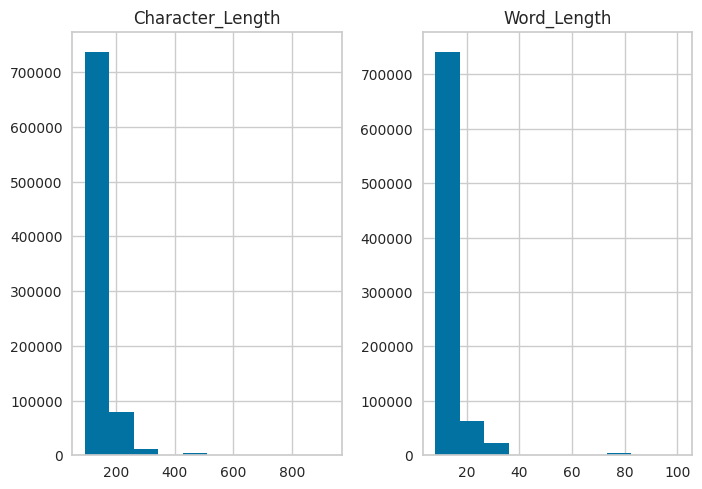

In [ ]:
columns = ['Character_Length', 'Word_Length']
df.hist(column=columns, grid=True)

In [ ]:
def plot_top_stopwords_barchart(text):
    stop = set(stopwords.words('english'))

    new = text.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    from collections import defaultdict
    dic = defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
    top = sorted(dic.items(), key = lambda x:x [1],reverse=True)[:10]
    x,y = zip(*top)
    plt.bar(x,y)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

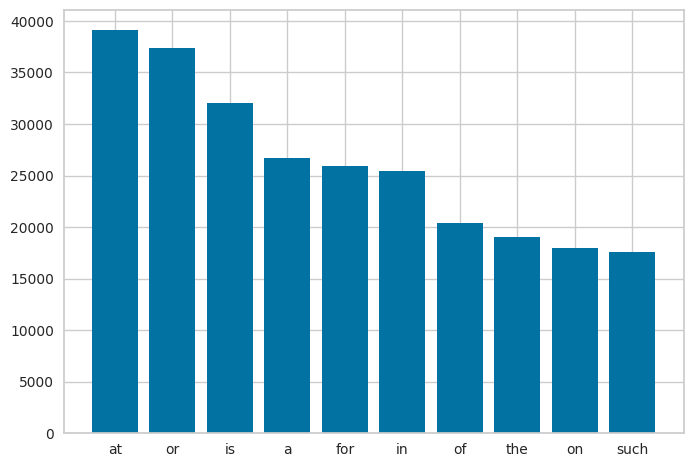

In [ ]:
plot_top_stopwords_barchart(df['Log'])

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub('<[^>]*>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    stop_words = set(stopwords.words('english'))
    text = [word for word in text.split() if word not in stop_words and word not in string.punctuation]
    text = ' '.join(word for word in text)
    return text

In [ ]:
df['Log'] = df['Log'].apply(clean_text)

In [ ]:
df.head()

,Log,Target,Character_Length,Word_Length,Avg Word
0,rmncju rmncju ras kernel info generating core,normal,128,10,11.700000
1,rmnacju rmnacju ras kernel info total interrup...,normal,271,32,7.437500
2,rmniju rmniju ras kernel info ciod received si...,normal,168,15,10.133333
3,rmncju rmncju ras kernel fatal program interru...,normal,153,12,11.666667
4,rmnacju rmnacju ras kernel info generating core,normal,128,10,11.700000
